<h1>Observations</h1>
<p>1. observation</p>
<p>2. observation</p>
<p>3. observation</p>

In [2]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [4]:
# Import data into pandas from CSV
city_data = 'raw_data/city_data.csv'
ride_data = 'raw_data/ride_data.csv'

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [20]:
# Quick look at city data
print(city_data_df.head(10))
print()
print(city_data_df.describe())
print()
print(city_data_df.dtypes)
print()
print(city_data_df.count())
print()
print(city_data_df["type"].value_counts())

                city  driver_count   type
0         Kelseyland            63  Urban
1         Nguyenbury             8  Urban
2       East Douglas            12  Urban
3      West Dawnfurt            34  Urban
4     Rodriguezburgh            52  Urban
5  South Josephville             4  Urban
6   West Sydneyhaven            70  Urban
7        Travisville            37  Urban
8        Torresshire            70  Urban
9          Lisaville            66  Urban

       driver_count
count    126.000000
mean      26.579365
std       21.438415
min        1.000000
25%        9.000000
50%       20.000000
75%       43.000000
max       73.000000

city            object
driver_count     int64
type            object
dtype: object

city            126
driver_count    126
type            126
dtype: int64

Urban       66
Suburban    42
Rural       18
Name: type, dtype: int64


In [21]:
# Quick look at city data
print(ride_data_df.head(10))
print()
print(ride_data_df.describe())
print()
print(ride_data_df.dtypes)
print()
print(ride_data_df.count())

            city                 date   fare        ride_id
0       Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1      South Roy  2016-01-02 18:42:34  17.49  4036272335942
2    Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3    Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4     Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673
5    New Jeffrey  2016-02-22 18:36:25  36.01  9757888452346
6  Port Johnstad  2016-06-07 02:39:58  17.15  4352278259335
7      Jacobfort  2016-09-20 20:58:37  22.98  1500221409082
8    Travisville  2016-01-15 17:32:02  27.39   850152768361
9     Sandymouth  2016-11-16 07:27:00  21.61  2389035050524

              fare       ride_id
count  2375.000000  2.375000e+03
mean     26.800552  4.865401e+12
std      12.007118  2.899040e+12
min       4.050000  2.238753e+09
25%      17.235000  2.360004e+12
50%      26.450000  4.821968e+12
75%      36.635000  7.366161e+12
max      59.650000  9.997901e+12

city        object
date        object
far

In [6]:
# DATASET 3
gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
members = [49, 92, 84, 53]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0, 0.05, 0, 0)

<h1>Total Fares by City Type</h1>

<h1>Total Rides by City Type</h1>

<h1>Total Drivers by City Type</h1>

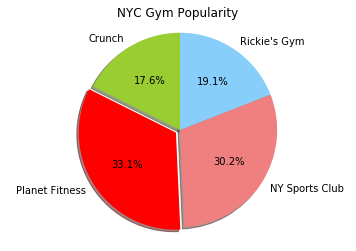

In [7]:
plt.title("NYC Gym Popularity")
plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [13]:
# DATASET 4
x_axis = np.arange(0, 10, 0.1)
times = []
for x in x_axis:
    times.append(x * x + np.random.randint(0, np.ceil(max(x_axis))))
    
print(max(x_axis))

9.9


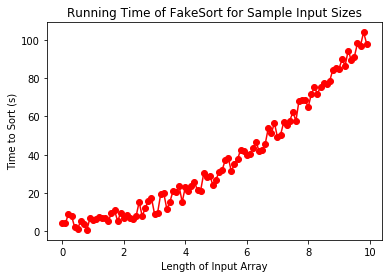

In [9]:
plt.title("Running Time of FakeSort for Sample Input Sizes")
plt.xlabel("Length of Input Array")
plt.ylabel("Time to Sort (s)")

plt.plot(x_axis, times, marker="o", color="red")
plt.show()